In [1]:
!python --version

Python 3.10.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

#Importing the data
credit_df = pd.read_csv("german_credit_data.csv", index_col=0)
credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
credit_df.shape

(1000, 10)

In [5]:
credit_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
credit_df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [7]:
credit_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
print("Saving accounts", credit_df['Saving accounts'].unique())
print("Checking accounts", credit_df['Checking account'].unique())

Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking accounts ['little' 'moderate' nan 'rich']


In [9]:
credit_df["Saving accounts"].fillna("none", inplace=True)
credit_df["Checking account"].fillna("none", inplace=True)

In [10]:
credit_df.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [11]:
# it's a library that we work with plotly
import plotly
import plotly.offline as py
import plotly.express as px 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = credit_df[credit_df["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = credit_df[credit_df["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = credit_df[credit_df["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = credit_df[credit_df["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [12]:
# import figure factory
import plotly.figure_factory as ff

data_matrix = credit_df.loc[:,["Age","Job", "Credit amount", 'Duration']]
data_matrix["index"] = np.arange(1,len(data_matrix)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data_matrix, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=900, width=800)
py.iplot(fig)

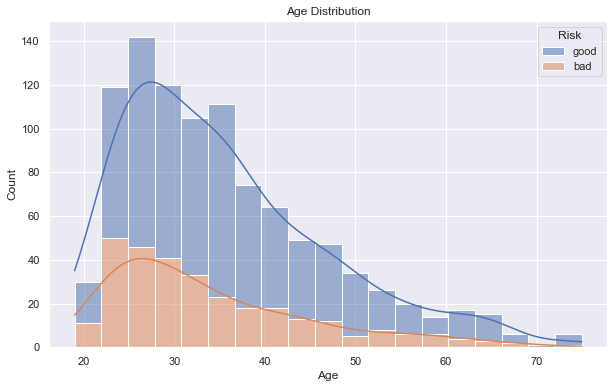

In [78]:
plt.figure(figsize=(10, 6))
age_disticution_df = credit_df[['Age', 'Risk']]
sns.histplot(data=age_disticution_df, x="Age", hue="Risk", multiple="stack", kde=True)
plt.title("Age Distribution")
plt.show()

In [25]:
df_good = credit_df.loc[credit_df["Risk"] == 'good']['Age'].values.tolist()
df_bad = credit_df.loc[credit_df["Risk"] == 'bad']['Age'].values.tolist()
df_age = credit_df['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = plotly.subplots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')